In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [134]:
# define dataset
series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# reshape to [10, 1]
n_features = 1
series = series.reshape((len(series), n_features))
# define generator
n_input = 2
generator = TimeseriesGenerator(series, series, length=n_input, batch_size=8)
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(generator, steps_per_epoch=1, epochs=500, verbose=0)
# make a one step prediction out of sample
x_input = array([9, 10]).reshape((1, n_input, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[10.683177]]


In [136]:
# define dataset
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95, 105])

In [137]:
# reshape series. from vector into columns
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))

In [138]:
# horizontally stack columns
dataset = np.hstack((in_seq1, in_seq2))

In [139]:
dataset

array([[ 10,  15],
       [ 20,  25],
       [ 30,  35],
       [ 40,  45],
       [ 50,  55],
       [ 60,  65],
       [ 70,  75],
       [ 80,  85],
       [ 90,  95],
       [100, 105]])

In [140]:
# # number of samples
# print('Samples: %d' % len(generator))
# # print each sample
# for i in range(len(generator)):
# 	x, y = generator[i]
# 	print('%s => %s' % (x, y))

In [141]:
# define generator
n_features = dataset.shape[1]
n_input = 2
generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=8)
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(generator, steps_per_epoch=1, epochs=500, verbose=0)
# make a one step prediction out of sample
x_input = np.array([[90, 95], [100, 105]]).reshape((1, n_input, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[110.18278 115.28493]]


In [142]:
sdata = pd.read_csv('https://raw.githubusercontent.com/fasthill/My-gist/main/data/SNP500/individual_stocks_5yr/ABBV_data.csv')

In [143]:
sdata.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,36.37,36.42,35.825,36.25,13858795,ABBV
1,2013-02-11,36.13,36.18,35.750,35.85,6031957,ABBV
2,2013-02-12,35.77,35.90,35.200,35.42,7473991,ABBV
3,2013-02-13,35.42,35.57,35.150,35.27,4860053,ABBV
4,2013-02-14,35.05,36.73,35.010,36.57,7570052,ABBV


In [144]:
ssdata = sdata.values

In [145]:
ssdata

array([['2013-02-08', 36.37, 36.42, ..., 36.25, 13858795, 'ABBV'],
       ['2013-02-11', 36.13, 36.18, ..., 35.85, 6031957, 'ABBV'],
       ['2013-02-12', 35.77, 35.9, ..., 35.42, 7473991, 'ABBV'],
       ...,
       ['2018-02-05', 113.0, 115.535, ..., 109.51, 9827825, 'ABBV'],
       ['2018-02-06', 104.91, 113.52, ..., 111.2, 14107829, 'ABBV'],
       ['2018-02-07', 111.52, 116.85, ..., 113.62, 10030837, 'ABBV']],
      dtype=object)

In [146]:
n_input = 5
generator = TimeseriesGenerator(ssdata[:,[1,4]], ssdata[:,[1,4]], length=n_input, batch_size=1)

In [148]:
# # number of samples
# print('Samples: %d' % len(generator))
# # print each sample
# for i in range(20):
# 	x, y = generator[i]
# 	print('%s => %s' % (x, y))

In [149]:
dataset = ssdata[:,[1,4]]

In [150]:
dataset

array([[36.37, 36.25],
       [36.13, 35.85],
       [35.77, 35.42],
       ...,
       [113.0, 109.51],
       [104.91, 111.2],
       [111.52, 113.62]], dtype=object)

In [151]:
# define generator
n_features = dataset.shape[1]
n_input = 5
generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=8)
# define model

In [153]:
# # number of samples
# print('Samples: %d' % len(generator))
# # print each sample
# for i in range(20):
# 	x, y = generator[i]
# 	print('%s => %s' % (x, y))

In [154]:
# define generator
n_features = dataset.shape[1]
n_input = 5
dataset = dataset.astype(float)
generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=8)
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(generator, steps_per_epoch=1, epochs=500, verbose=0)
# make a one step prediction out of sample
xx_in = np.array([[36.37, 36.25],
  [36.13,  35.85],
  [35.77,  35.42],
  [35.42, 35.27],
  [35.05, 36.57]])
x_input = xx_in.reshape((1, n_input, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[36.625095 37.046135]]


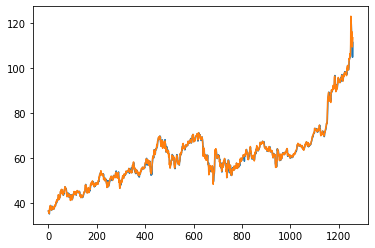

In [155]:
plt.plot(dataset)

In [157]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test = train_test_split(dataset, test_size=0.2, shuffle=False)

In [160]:
X_test

array([[ 60.14 ,  60.52 ],
       [ 60.74 ,  60.84 ],
       [ 60.85 ,  60.42 ],
       [ 60.58 ,  60.51 ],
       [ 60.44 ,  60.82 ],
       [ 60.92 ,  61.65 ],
       [ 61.67 ,  61.48 ],
       [ 61.54 ,  61.77 ],
       [ 61.84 ,  61.83 ],
       [ 61.72 ,  61.36 ],
       [ 61.68 ,  61.94 ],
       [ 61.92 ,  62.09 ],
       [ 62.02 ,  62.22 ],
       [ 62.11 ,  61.84 ],
       [ 62.16 ,  62.83 ],
       [ 62.78 ,  63.25 ],
       [ 63.11 ,  63.34 ],
       [ 63.   ,  63.55 ],
       [ 63.14 ,  63.69 ],
       [ 63.75 ,  64.14 ],
       [ 64.14 ,  64.5  ],
       [ 65.3  ,  65.88 ],
       [ 65.87 ,  65.85 ],
       [ 65.88 ,  65.67 ],
       [ 65.7  ,  66.55 ],
       [ 66.4  ,  65.9  ],
       [ 66.04 ,  65.69 ],
       [ 65.78 ,  65.8  ],
       [ 65.96 ,  65.35 ],
       [ 65.38 ,  65.52 ],
       [ 65.52 ,  65.65 ],
       [ 65.51 ,  65.62 ],
       [ 65.37 ,  66.1  ],
       [ 65.96 ,  65.98 ],
       [ 65.95 ,  65.77 ],
       [ 65.76 ,  65.46 ],
       [ 65.46 ,  65.16 ],
 

In [162]:
dataset = X_train

In [165]:
# define generator
n_features = dataset.shape[1]
n_input = 5
dataset = dataset.astype(float)
generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=8)
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(generator, steps_per_epoch=1, epochs=500, verbose=0)


In [166]:
dataset = X_test

In [168]:
n_input = 5
dataset = dataset.astype(float)
generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=8)
# make a one step prediction out of sample
predictions = model.predict(generator)
predictions[1]

array([57.643055, 58.698215], dtype=float32)

In [173]:
results = model.evaluate(generator)

31/31 [==============================] - 0s 1ms/step - loss: 26.2170


In [174]:
results

26.21704864501953